<a href="https://colab.research.google.com/github/RaghavS00d/Medicarechatbot/blob/main/INTERNSHIP_COMPSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk


In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install newspaper3k

In [ ]:
#importing libraries
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
import string
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf 
import tensorflow as keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
symp=['itching',
 'skin rash',
 'nodal skin eruptions',
 'continuous sneezing',
 'shivering',
 'chills',
 'joint pain',
 'stomach pain',
 'acidity',
 'ulcers on tongue',
 'muscle wasting',
 'vomiting',
 'burning micturition',
 'spotting  urination',
 'fatigue',
 'weight gain',
 'anxiety',
 'cold hands and feets',
 'mood swings',
 'weight loss',
 'restlessness',
 'lethargy',
 'patches in throat',
 'irregular sugar level',
 'cough',
 'high fever',
 'sunken eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish skin',
 'dark urine',
 'nausea',
 'loss of appetite',
 'pain behind the eyes',
 'back pain',
 'constipation',
 'abdominal pain',
 'diarrhoea',
 'mild fever',
 'yellow urine',
 'yellowing of eyes',
 'acute liver failure',
 'fluid overload',
 'swelling of stomach',
 'swelled lymph nodes',
 'malaise',
 'blurred and distorted vision',
 'phlegm',
 'throat irritation',
 'redness of eyes',
 'sinus pressure',
 'runny nose',
 'congestion',
 'chest pain',
 'weakness in limbs',
 'fast heart rate',
 'pain during bowel movements',
 'pain in anal region',
 'bloody stool',
 'irritation in anus',
 'neck pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen legs',
 'swollen blood vessels',
 'puffy face and eyes',
 'enlarged thyroid',
 'brittle nails',
 'swollen extremeties',
 'excessive hunger',
 'extra marital contacts',
 'drying and tingling lips',
 'slurred speech',
 'knee pain',
 'hip joint pain',
 'muscle weakness',
 'stiff neck',
 'swelling joints',
 'movement stiffness',
 'spinning movements',
 'loss of balance',
 'unsteadiness',
 'weakness of one body side',
 'loss of smell',
 'bladder discomfort',
 'foul smell of urine',
 'continuous feel of urine',
 'passage of gases',
 'internal itching',
 'toxic look (typhos)',
 'depression',
 'irritability',
 'muscle pain',
 'altered sensorium',
 'red spots over body',
 'belly pain',
 'abnormal menstruation',
 'dischromic  patches',
 'watering from eyes',
 'increased appetite',
 'polyuria',
 'family history',
 'mucoid sputum',
 'rusty sputum',
 'lack of concentration',
 'visual disturbances',
 'receiving blood transfusion',
 'receiving unsterile injections',
 'coma',
 'stomach bleeding',
 'distention of abdomen',
 'history of alcohol consumption',
 'fluid overload',
 'blood in sputum',
 'prominent veins on calf',
 'palpitations',
 'painful walking',
 'pus filled pimples',
 'blackheads',
 'scurring',
 'skin peeling',
 'silver like dusting',
 'small dents in nails',
 'inflammatory nails',
 'blister',
 'red sore around nose',
 'yellow crust ooze']


Epoch 1/40
116/116 [==============================] - 1s 3ms/step - loss: 3.6279 - accuracy: 0.1149
Epoch 2/40
116/116 [==============================] - 0s 3ms/step - loss: 3.4313 - accuracy: 0.5263
Epoch 3/40
116/116 [==============================] - 0s 4ms/step - loss: 3.2137 - accuracy: 0.7412
Epoch 4/40
116/116 [==============================] - 0s 3ms/step - loss: 2.9578 - accuracy: 0.8306
Epoch 5/40
116/116 [==============================] - 0s 3ms/step - loss: 2.6558 - accuracy: 0.8878
Epoch 6/40
116/116 [==============================] - 0s 3ms/step - loss: 2.3221 - accuracy: 0.9333
Epoch 7/40
116/116 [==============================] - 0s 3ms/step - loss: 1.9811 - accuracy: 0.9545
Epoch 8/40
116/116 [==============================] - 0s 3ms/step - loss: 1.6500 - accuracy: 0.9843
Epoch 9/40
116/116 [==============================] - 1s 5ms/step - loss: 1.3390 - accuracy: 0.9959
Epoch 10/40
116/116 [==============================] - 1s 5ms/step - loss: 1.0555 - accuracy: 0.9989

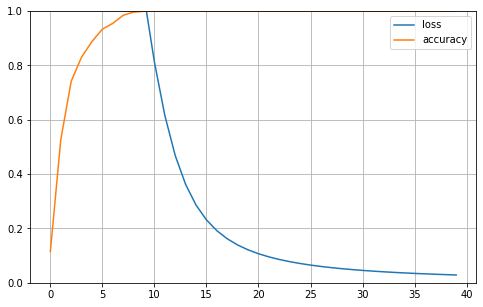

39/39 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 1.0000


[0.028395898640155792, 1.0]

In [ ]:
training_dataset = pd.read_csv('training.csv')
test_dataset = pd.read_csv('testing.csv')

X = training_dataset.iloc[:, 0:132].values
y = training_dataset.iloc[:, -1].values

dimensionality_reduction = training_dataset.groupby(training_dataset['prognosis']).max()

dimensionality_reduction

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train

np.amax(y)

keras.__version__

model = keras.Sequential()
model.add(keras.layers.Dense(300, activation="relu",input_dim=132))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(41, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

y_train.shape

history = model.fit(X_train, y_train, epochs=40)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

model.evaluate(X_test,y_test)



In [ ]:
disease_names=dimensionality_reduction.index

In [ ]:
 nltk.download('punkt',quiet=True)

True

In [ ]:
article= Article("https://www.healthline.com/health/allergies#symptoms")
article.download()
article.parse()
article.nlp()
corpus=article.text

In [ ]:
def u_predict(data):
  y_proba=model.predict(data)
  y_proba.round(2)
  classess_x=np.argmax(y_proba,axis=1)
  print("possible disease:",np.array(disease_names)[classess_x])
  print("Consult your nearest doctor")
def u_cred(user_input):
  user_cred=list(user_input.split(", "))
  return user_cred

def u_data():
  df = pd.DataFrame(np.zeros((1, 132)))
  df.columns=symp
  df.index=['Symptoms']
  for i in range(len(spc)):
    df[spc[i]]=df[spc[i]].replace(0,1)
  u_predict=df.to_numpy()
  return u_predict

def index_sort(list_var):
  length=len(list_var)
  list_index=list(range(0,length))
  x=list_var
  for i in range (length):
    for j in range(length):
      if x[list_index[i]]>x[list_index[j]]:
        temp= list_index[i]
        list_index[i]=list_index[j]
        list_index[j]=temp
  return list_index


In [ ]:
def greeting_response(text):
  text=text.lower()
  bot_greetings=["Hello there, how can I help you","How can I be of help today"]
  user_greeting=['hi','hey','hello']
  for word in text.split():
    if word in user_greeting:
      return random.choice(bot_greetings)

def bot_response(user_input):
  user_input=user_input.lower()
  
  sentence_list.append(user_input)
  bot_response=''
  cm=CountVectorizer().fit_transform(sentence_list)
  similarity_scores=cosine_similarity(cm[-1],cm)
  similarity_scores_list=similarity_scores.flatten()
  index=index_sort(similarity_scores_list)
  index=index[1:]
  response_flag=0
  j=0
  for i in range(len(index)):
    if similarity_scores_list[index[i]]>0.0:
      bot_response=bot_response+' '+sentence_list[index[i]]
      response_flag=1
      j=j+1
    if j>2:
      break

    if response_flag==0:
      bot_response=bot_response+' '+"I apologize I didn't understand you."
    sentence_list.remove(user_input)
    return bot_response




In [ ]:
# start the chat
print("Jarvis:Hi I am Jarvis, please enter your Name, Age, Gender ")
exit_list=['exit','bye','thank you','quit','break','thanks','done']
spc=[]
info=[]
while True:
  user_input= input()
  u_cred(user_input)
  print("Jarvis: Please enter your symptoms or press bye to exit:")
  user_input2= input()
  info=user_input+user_input2
  u_sym=list(user_input2.split(", "))
  for i in range(len(u_sym)):
    for j in range(len(symp)):
      if fuzz.partial_ratio(u_sym[i],symp[j])>90:
        spc.append(symp[j]) 
  if user_input2.lower() in exit_list:
    print("Jarvis:Thank you,Stay safe!")
    break
  else:
    if greeting_response(user_input2)!=None:
      print('Jarvis:'+greeting_response(user_input2))

  u_data()
  u_predict(u_data())



Jarvis:Hi I am Jarvis, please enter your Name, Age, Gender 
Jarvis: Please enter your symptoms or press bye to exit:
possible disease: ['AIDS']
Consult your nearest doctor
ok
Jarvis: Please enter your symptoms or press bye to exit:


KeyboardInterrupt: ignored